### 1. Load data

In [6]:
from utils.datahandler import DataHandler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
datahandler = DataHandler()

datahandler.load_data(path='/content/drive/MyDrive/Colab Notebooks/Praca licencjacka/healthcare-dataset-stroke-data.csv')

datahandler.prepare_data()
df = datahandler.get_data()
X_train, X_test, y_train, y_test = datahandler.get_data_split()

In [ ]:
df

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,67.0,0,1,228.69,36.600000,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,61.0,0,0,202.21,28.893237,1
2,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,80.0,0,1,105.92,32.500000,1
3,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,49.0,0,0,171.23,34.400000,1
4,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,80.0,1,0,83.75,28.893237,0
5106,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,81.0,0,0,125.20,40.000000,0
5107,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,35.0,0,0,82.99,30.600000,0
5108,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,51.0,0,0,166.29,25.600000,0


In [ ]:
j = 0 #This record will be explain

X_test.iloc[j, :]

,2085
gender_Female,0.00
gender_Male,1.00
gender_Other,0.00
ever_married_No,0.00
ever_married_Yes,1.00
work_type_Govt_job,0.00
work_type_Never_worked,0.00
work_type_Private,1.00
work_type_Self-employed,0.00
work_type_children,0.00


## 2. RandomForest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
print(f"F1 Score {f1_score(y_test, y_pred)}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))

F1 Score 0.03636363636363636
Accuracy 0.9481409001956947
[[968   4]
 [ 49   1]]


### 2.1. Lime

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=51ba285d09fe6d1dba06f219439bf203b71cf9e62c33f3a7d2461eaff5dbfc13
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_tabular

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                              feature_names=X_train.columns.values,
                                              verbose=True)

In [ ]:
exp = explainer.explain_instance(data_row=X_test.values[j],
                                 predict_fn=rf.predict_proba)

exp.show_in_notebook(show_table=True)

Intercept 0.1303504259445707
Prediction_local [0.14290146]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


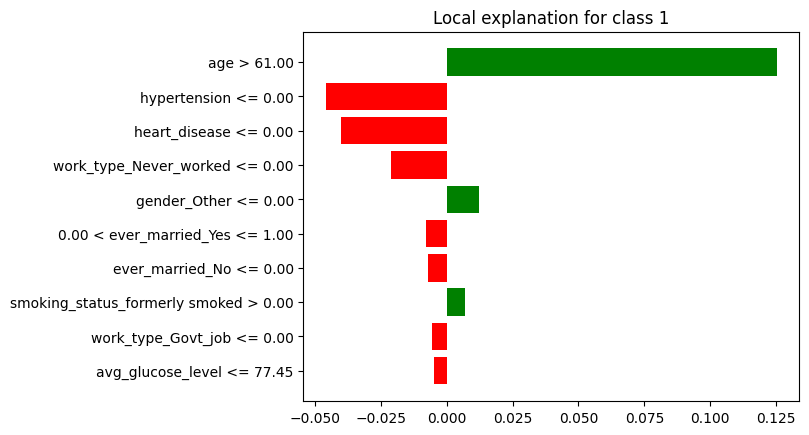

In [ ]:
_ = exp.as_pyplot_figure()

In [ ]:
def return_weights(exp):
  exp_list = exp.as_map()[1]
  exp_list = sorted(exp_list, key=lambda x: x[0])
  exp_weights = [x[1] for x in exp_list]
  return exp_weights

In [ ]:
weights = []

for i in X_test.values[0:100]:
  exp = explainer.explain_instance(data_row=i,
                                   predict_fn=rf.predict_proba,
                                   num_features=len(X_test.columns.values))
  exp_weights = return_weights(exp)
  weights.append(exp_weights)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.07371205023956132
Prediction_local [0.14258798]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.15586137443021217
Prediction_local [-0.00556328]
Right: 0.0
Intercept 0.16864921631185378
Prediction_local [0.04030877]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.14502467746905595
Prediction_local [0.02378804]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.13543198843027338
Prediction_local [0.02184035]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16192904606650962
Prediction_local [0.01180623]
Right: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16624455570100147
Prediction_local [0.04831274]
Right: 0.06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.15796073812238354
Prediction_local [0.12987904]
Right: 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.14082677070007465
Prediction_local [0.02853693]
Right: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.12976101662196718
Prediction_local [0.15244639]
Right: 0.27


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11743593854154696
Prediction_local [0.01438896]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1468064383421156
Prediction_local [0.12801517]
Right: 0.03


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16154312964284887
Prediction_local [0.04831873]
Right: 0.07


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1273233773604242
Prediction_local [0.13528492]
Right: 0.51


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.12319333532773633
Prediction_local [0.03052106]
Right: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16493115869367733
Prediction_local [0.0074565]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.21570053716902274
Prediction_local [0.01625473]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.15464178048094152
Prediction_local [0.0318691]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.025121100537410512
Prediction_local [0.2093458]
Right: 0.35


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16306145761042845
Prediction_local [0.01152789]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.14394451750558318
Prediction_local [0.0167982]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.10328358246354286
Prediction_local [0.05079506]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.29570420858246993
Prediction_local [0.03452273]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.18995846998653643
Prediction_local [0.01874419]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.09421828375545507
Prediction_local [0.18858971]
Right: 0.38


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1484766993418283
Prediction_local [0.03826587]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.2603462159047179
Prediction_local [0.00999519]
Right: 0.03
Intercept 0.15548989977052502
Prediction_local [0.03609744]
Right: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.049417778553830866
Prediction_local [0.18375479]
Right: 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11131573777361788
Prediction_local [0.03163948]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.149628070660984
Prediction_local [0.01992204]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11814446250029487
Prediction_local [0.01700786]
Right: 0.0
Intercept 0.17017225875246184
Prediction_local [0.01042171]
Right: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.19222521954891428
Prediction_local [0.01978074]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.12110345126088794
Prediction_local [0.12556617]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11445047960226519
Prediction_local [0.04082987]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.09175407943588523
Prediction_local [0.06183401]
Right: 0.07


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.21237109162265766
Prediction_local [0.00257396]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1214371939702019
Prediction_local [0.13135734]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.10598795586958039
Prediction_local [0.14485126]
Right: 0.53


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.2400993315971817
Prediction_local [0.01770639]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.18021334014904378
Prediction_local [0.00749194]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16642144818855978
Prediction_local [-0.00855809]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11886631975983251
Prediction_local [0.14719747]
Right: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11948802016240964
Prediction_local [0.13359712]
Right: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1305821998851211
Prediction_local [0.14615477]
Right: 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.10622142031004332
Prediction_local [0.01886942]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.17727723094615833
Prediction_local [0.00576142]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.15506650761737364
Prediction_local [0.0248266]
Right: 0.06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.15093851227586674
Prediction_local [0.02593963]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.13693772256799525
Prediction_local [0.15490435]
Right: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.18695039078423897
Prediction_local [0.03429622]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.125262349902469
Prediction_local [0.02963941]
Right: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.2068412840412802
Prediction_local [0.05162553]
Right: 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16899491929312072
Prediction_local [0.02431479]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.09890969891315765
Prediction_local [0.15805694]
Right: 0.38


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.14384354326197665
Prediction_local [0.02724318]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.0722870752218487
Prediction_local [0.18466192]
Right: 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16304066404055956
Prediction_local [-0.00081375]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1930209220476521
Prediction_local [0.02212728]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.17035402214346246
Prediction_local [0.00538409]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11572580571382345
Prediction_local [0.11764998]
Right: 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16008173908705123
Prediction_local [0.01555648]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.08408901409844184
Prediction_local [0.15292368]
Right: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.10180933211070015
Prediction_local [0.08044186]
Right: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16297647076560537
Prediction_local [0.02297021]
Right: 0.03


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11891123589355124
Prediction_local [0.03071977]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.17867113557616848
Prediction_local [0.03578938]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.10639675338746972
Prediction_local [0.06822865]
Right: 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.15992477116211282
Prediction_local [0.0147712]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1550374579637554
Prediction_local [0.02719255]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.15408717458818494
Prediction_local [0.02051998]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.12840456625452207
Prediction_local [0.13738835]
Right: 0.04


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.17727074240082402
Prediction_local [0.01103459]
Right: 0.0
Intercept 0.18096112232539158
Prediction_local [0.01599567]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1584291956069761
Prediction_local [0.02728325]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.12203327998113395
Prediction_local [0.13671136]
Right: 0.06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.199120295002811
Prediction_local [0.03478303]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.034450844254301616
Prediction_local [0.24377767]
Right: 0.26


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1466963184761918
Prediction_local [0.12952526]
Right: 0.05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1466337653831915
Prediction_local [7.94198319e-05]
Right: 0.0
Intercept 0.1470675541954074
Prediction_local [0.00143336]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.17308516889611852
Prediction_local [0.08353717]
Right: 0.06


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1581462655009574
Prediction_local [0.0246898]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.15745967356802754
Prediction_local [0.02065176]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.17566823841591048
Prediction_local [0.01658847]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11353188276359127
Prediction_local [0.15181919]
Right: 0.27
Intercept 0.12575607895623828
Prediction_local [0.02379308]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.18531297796460783
Prediction_local [0.02332818]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.17870630555856712
Prediction_local [0.02164995]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.1686641867356598
Prediction_local [0.01479195]
Right: 0.02


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.06910217018321776
Prediction_local [0.19603317]
Right: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.16683822659652295
Prediction_local [0.01667646]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.14951650004852393
Prediction_local [0.0264523]
Right: 0.04


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.05601637462477707
Prediction_local [0.20745302]
Right: 0.16
Intercept 0.14437618156250126
Prediction_local [0.02484988]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11464964623019405
Prediction_local [-0.0001046]
Right: 0.04


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.11038925844076677
Prediction_local [0.02996942]
Right: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.13728232769572601
Prediction_local [0.01681058]
Right: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.18138415720464734
Prediction_local [0.00209607]
Right: 0.0


In [ ]:
lime_weights = pd.DataFrame(data=weights, columns=X_test.columns)
lime_weights

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
0,-0.001913,0.000485,0.035708,-0.008886,-0.009318,-0.002366,0.009958,0.007032,-0.004393,0.004269,...,-0.001445,0.001583,0.005945,0.001507,-0.004089,0.122928,-0.047449,-0.036152,-0.004242,0.001426
1,-0.003404,0.000653,0.023826,-0.008493,-0.010268,-0.002067,-0.004505,0.004796,-0.003878,0.000474,...,0.002398,0.004196,-0.007039,0.000279,0.000621,-0.048949,-0.050973,-0.039587,-0.010650,-0.004853
2,0.001207,0.002055,0.000000,0.010032,0.012550,-0.009533,-0.000647,-0.003913,-0.005643,-0.006511,...,0.004554,0.000031,-0.011947,0.000286,-0.002528,-0.052975,-0.052843,-0.042076,0.018560,0.010991
3,0.004539,0.000653,0.000000,0.011643,0.010376,-0.008851,0.000263,-0.000386,-0.002382,0.006639,...,0.003605,0.002906,-0.007553,0.001327,-0.004763,-0.050150,-0.046809,-0.032763,-0.011942,-0.000200
4,0.000107,0.001362,-0.018946,0.010012,0.010648,-0.001382,0.032950,0.004001,-0.002797,0.004658,...,-0.002573,0.000157,-0.007408,0.002950,-0.004584,-0.050195,-0.047118,-0.037625,-0.006197,0.000124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.000151,0.000901,0.008402,-0.008700,-0.010632,-0.004070,-0.001558,-0.000160,0.003632,0.002786,...,0.003938,0.004042,-0.007486,0.000676,-0.002624,-0.019190,-0.048869,-0.027289,-0.009048,-0.004475
96,0.001186,-0.002420,0.022161,-0.006963,-0.010918,-0.000450,0.024104,0.002756,-0.003706,0.002990,...,-0.000538,-0.000632,-0.003433,0.001664,-0.001093,-0.046294,-0.043016,-0.038032,-0.003016,-0.006680
97,0.000868,0.002765,0.017446,-0.007671,-0.008541,-0.000867,0.022805,0.005514,-0.002301,0.007572,...,-0.003064,-0.002196,-0.006713,0.003954,-0.005121,-0.019097,-0.044422,-0.038944,-0.007964,0.005534
98,0.000548,-0.003841,0.011744,0.011932,0.007220,0.002988,0.006767,-0.003451,-0.002895,0.003143,...,0.004842,-0.000278,-0.009269,-0.000434,0.001272,-0.051516,-0.047669,-0.038370,-0.009749,-0.000566


In [ ]:
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame(data={'feature':abs_mean.index, 'abs_mean':abs_mean})
abs_mean = abs_mean.sort_values(by='abs_mean')

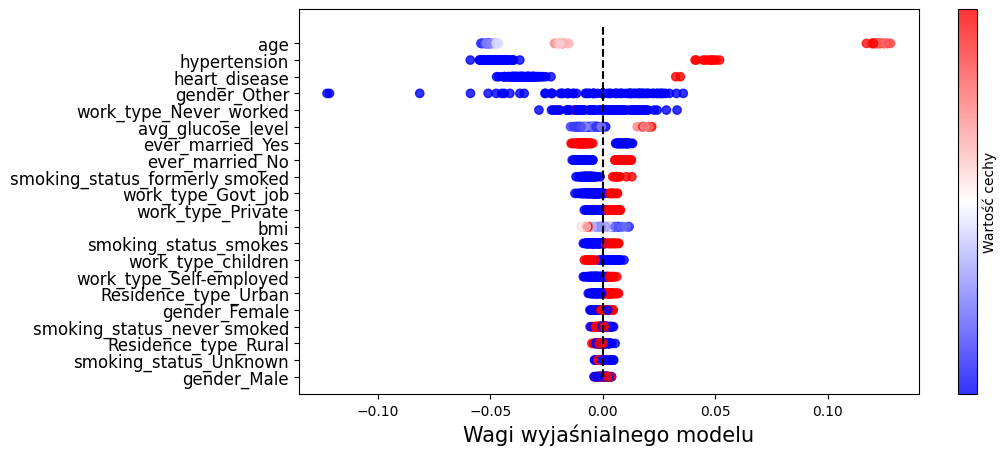

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

y_ticks = range(len(abs_mean))
y_labels = abs_mean['feature']

for i, feature in enumerate(y_labels):
  feature_weight = lime_weights[feature]
  feature_value = X_test[feature][0:100]

  plt.scatter(x=feature_weight,
              y=[i]*len(feature_weight),
              c=feature_value,
              cmap='bwr',
              alpha=0.8)


plt.vlines(x=0, ymin=0, ymax=len(abs_mean), color='black', linestyles='dashed')
plt.colorbar(label="Value of feature", ticks=[])

plt.yticks(y_ticks, y_labels, size=12)
plt.xlabel("Weight of LIME model", size=15)

plt.show()

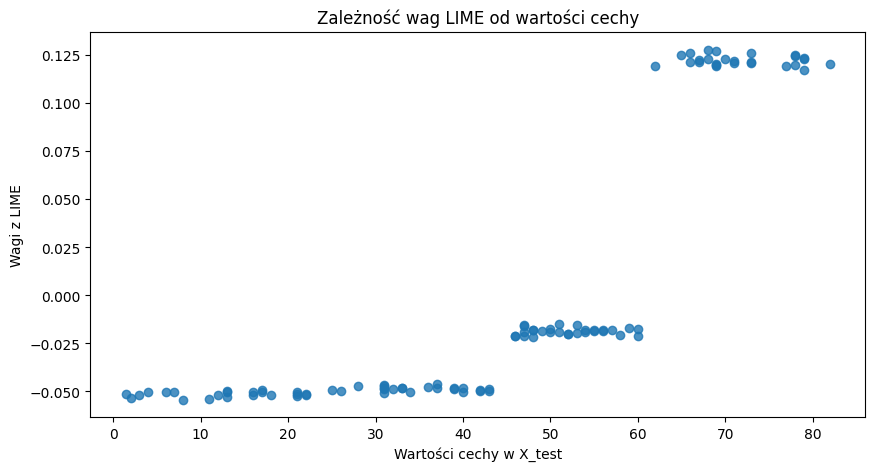

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sorted_indices = np.argsort(X_test[feature][0:100].values)
X_test_sorted = X_test[feature][0:100].values[sorted_indices]
lime_weights_sorted = lime_weights[feature].values[sorted_indices]

plt.scatter(x=X_test_sorted,
            y=lime_weights_sorted,
            alpha=0.8)

plt.xlabel("Value of 'age' feature from X_test")
plt.ylabel("Weights of LIME model")
plt.title("Relentionship of LIME weights and value of 'age'")

plt.show()

### 2.2. SHAP

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.1 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
shap.initjs()

explainer = shap.Explainer(rf.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 1023it [07:08,  2.39it/s]


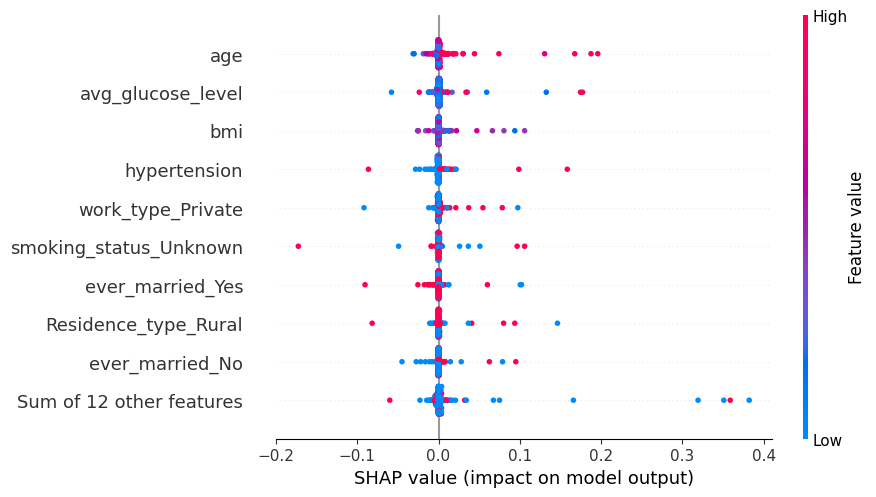

In [ ]:
shap.initjs()

shap.plots.beeswarm(shap_values)

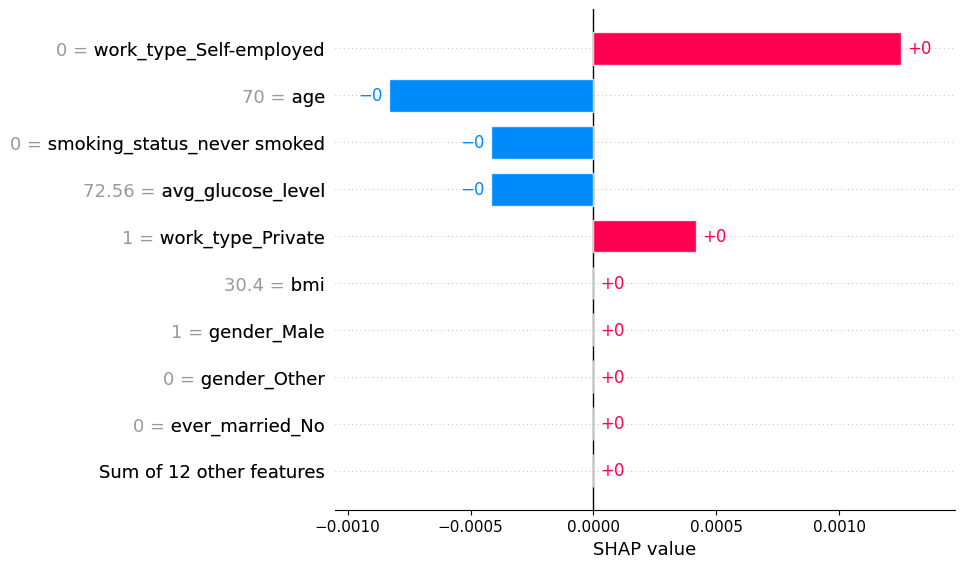

In [ ]:
shap.initjs()

shap.plots.bar(shap_values[j])

### 2.3. Partial Dependance Plot

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
feature = 'age'

pdp_lines = partial_dependence(estimator=rf,
                               X=X_test,
                               features=[feature],
                               percentiles=(0, 1),
                               kind='average')

In [ ]:
pdp_lines

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


{'grid_values': [array([ 0.16,  0.24,  0.32,  0.48,  0.56,  0.72,  0.88,  1.24,  1.32,
          1.4 ,  1.48,  1.56,  1.72,  1.8 ,  1.88,  2.  ,  3.  ,  4.  ,
          5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
         14.  , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 21.  , 22.  ,
         23.  , 24.  , 25.  , 26.  , 27.  , 28.  , 29.  , 30.  , 31.  ,
         32.  , 33.  , 34.  , 35.  , 36.  , 37.  , 38.  , 39.  , 40.  ,
         41.  , 42.  , 43.  , 44.  , 45.  , 46.  , 47.  , 48.  , 49.  ,
         50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 56.  , 57.  , 58.  ,
         59.  , 60.  , 61.  , 62.  , 63.  , 64.  , 65.  , 66.  , 67.  ,
         68.  , 69.  , 70.  , 71.  , 72.  , 73.  , 74.  , 75.  , 76.  ,
         77.  , 78.  , 79.  , 80.  , 81.  , 82.  ])],
 'values': [array([ 0.16,  0.24,  0.32,  0.48,  0.56,  0.72,  0.88,  1.24,  1.32,
          1.4 ,  1.48,  1.56,  1.72,  1.8 ,  1.88,  2.  ,  3.  ,  4.  ,
          5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  ,

In [ ]:
print(len(pdp_lines['average'][0]))
print(np.shape(pdp_lines['values']))
print(np.shape(pdp_lines['grid_values']))

96
(1, 96)
(1, 96)


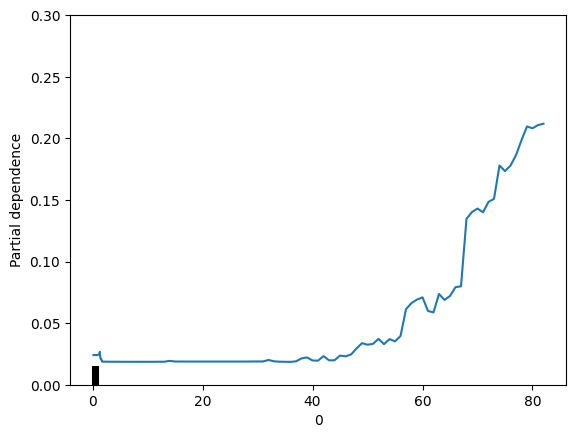

In [ ]:
deciles = {0: np.linspace(0, 1, num=5)}

display = PartialDependenceDisplay(
    [pdp_lines], features=[(0,)], feature_names=[0],
    target_idx=0, deciles=deciles
)
display.plot(pdp_lim={1: (0.0, 0.3)})

### 2.4. Individual Conditional Expectation

In [ ]:
from sklearn.inspection import partial_dependence

In [ ]:
pdp_lines = partial_dependence(estimator=rf,
                               X=X_test,
                               features=[feature],
                               percentiles=(0, 1),
                               kind='both')

In [ ]:
pdp_lines['individual'][0]

array([[0.  , 0.  , 0.  , ..., 0.25, 0.24, 0.45],
       [0.  , 0.  , 0.  , ..., 0.11, 0.14, 0.12],
       [0.  , 0.  , 0.  , ..., 0.33, 0.28, 0.26],
       ...,
       [0.  , 0.  , 0.  , ..., 0.2 , 0.21, 0.27],
       [0.  , 0.  , 0.  , ..., 0.05, 0.05, 0.07],
       [0.  , 0.  , 0.  , ..., 0.25, 0.2 , 0.21]])

In [ ]:
#Wyśrodkowanie lini

for i in range(len(pdp_lines['individual'][0])):
    pdp_start = pdp_lines['individual'][0][i][0]
    pdp_lines['individual'][0][i] = pdp_lines['individual'][0][i] - pdp_start

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


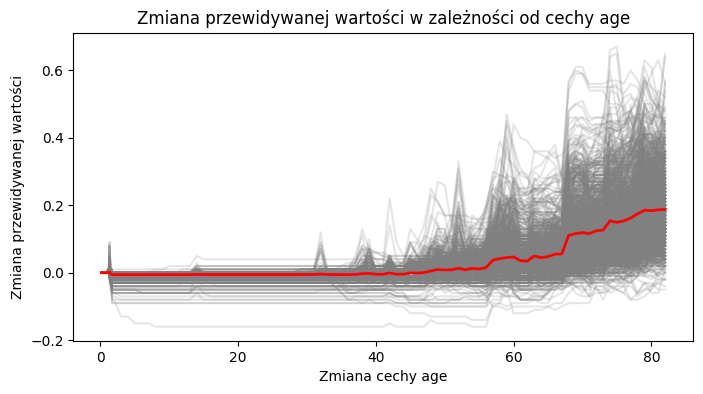

In [ ]:
plt.figure(figsize=(8, 4))

for i in range(len(pdp_lines['individual'][0])):
    plt.plot(pdp_lines['values'][0],
             pdp_lines['individual'][0][i],
             color='gray',
             alpha=0.2)

pdp_avg = pdp_lines['average'][0] - pdp_lines['average'][0][0]
plt.plot(pdp_lines['values'][0], pdp_avg, linewidth=2, color='red')

plt.title("Zmiana przewidywanej wartości w zależności od cechy age")
plt.ylabel("Zmiana przewidywanej wartości")
plt.xlabel("Zmiana cechy age")

plt.show()